## Selected Topics in Machine Learning – Assignment 1
### Shailesh Patro

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## list inputs

N = 50 # Sample size
# M = 6 # number of gaussian basis functions
# iteration = 1000 # else recognized as number of batches
# learning_rate = 0.01 # the eta in newton's method
sigma = 0.1 # noise in data

## sample data points from a sine wave 
x_vals = np.random.uniform(0.0, 1.0, N) # A sort may make this easy to graph this later
y_vals = np.sin(np.pi*2*x_vals) + np.random.normal(0, sigma, N) # noisy

# def get_batch():
#     choices = np.random.choice(np.arange(N), size=BATCH_SIZE)
#     return x[choices], y[choices].flatten()

class Model():
    def __init__(self, session, iterations, learning_rate, M):
        self.session = session
        self.iterations = iterations
        self.M = M
        self.learning_rate = learning_rate
        self.genGraphVarsOps()
        
    def genGraphVarsOps(self):
        
        # Init Variables
        self.x = tf.placeholder(tf.float32, shape=[])
        self.y = tf.placeholder(tf.float32, shape=[])
        
        self.w = tf.get_variable("w", [1, self.M], tf.float32,
                        initializer = tf.random_normal_initializer())
        self.sigma = tf.get_variable("sigma", [self.M, 1], tf.float32,
                        initializer = tf.random_uniform_initializer())
        self.mu = tf.get_variable("mu", [self.M, 1], tf.float32, initializer = tf.random_normal_initializer())
        self.b = tf.get_variable("b", [], tf.float32, initializer = tf.zeros_initializer())
        
        
        # Def Operations - (May need to verify for matrix applicability)
        self.gaussian = tf.exp(-1*(self.x-self.mu)**2/self.sigma**2)
        self.yhat = tf.matmul(self.w, self.gaussian) + self.b
        self.loss = tf.reduce_mean(0.5*(self.y-self.yhat)**2)
    
    def train(self, x_vals, y_vals):
        self.optim = tf.train.GradientDescentOptimizer(self.learning_rate).minimize(self.loss)
        self.session.run(tf.global_variables_initializer())
        for _ in range(self.iterations):
            for x, y in zip(x_vals, y_vals):
                self.session.run(self.optim, feed_dict={self.x: x, self.y: y})
    
    def predict(self, x):
        return np.asscalar(self.session.run(self.yhat, feed_dict={self.x:x}))
            

In [4]:
# N = 50 # Sample size
M = 6 # number of gaussian basis functions
iteration = 1000 # else recognized as number of batches
learning_rate = 0.01 # the eta in newton's method
# sigma = 0.1 # noise in data

sess = tf.Session()
model = Model(sess, iteration, learning_rate, M)
model.train(x_vals, y_vals)

with tf.variable_scope("", reuse=True):
    w_vals = sess.run(tf.get_variable("w"))
    mu_vals = sess.run(tf.get_variable("mu"))
    sigma_vals = sess.run(tf.get_variable("sigma"))
    b_vals = sess.run(tf.get_variable("b"))

print("w", w_vals)
print("mu", mu_vals)
print("sigma", sigma_vals)
print("b", b_vals)

w [[ 0.5430794  -0.6403065  -1.0416474   0.19963558  1.3631881  -0.35951003]]
mu [[-1.2893306 ]
 [ 0.41097158]
 [ 0.737629  ]
 [-0.7468096 ]
 [ 0.31323954]
 [ 2.2639017 ]]
sigma [[ 0.21931672]
 [-0.16525438]
 [ 0.20556402]
 [ 0.09034097]
 [ 0.21063262]
 [ 0.09513772]]
b 0.053685997


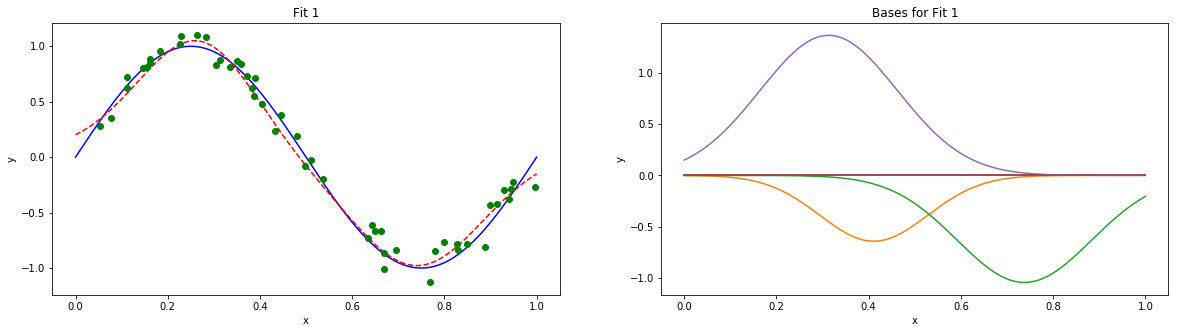

In [5]:
figure = plt.figure(figsize=(20,5))

p = plt.subplot(1,2,1)
x_np = np.linspace(0, 1, 500)
y_np = []
for _ in x_np:
    y_np.append(model.predict(_))
y_np = np.array(y_np)

p.plot(x_np, np.sin(2*np.pi*x_np), "b")
p.plot(x_np, y_np, 'r--')
p.plot(x_vals, y_vals, 'go')
p.set_xlabel('x')
p.set_ylabel('y')
p.set_title('Fit 1')

basis_curves = []
for w_, mu_, sigma_ in zip(w_vals[0], mu_vals, sigma_vals):
    y_ = w_*np.exp(-1*(x_np-mu_)**2/sigma_**2)
    basis_curves.append(y_)
p = plt.subplot(1,2,2)
for curves in basis_curves:
    p.plot(x_np, curves)
# p.plot(x_np, sess.run(tf.multiply(model.w, tf.transpose(model.gaussian)) + model.b, feed_dict={model.x: x_np}))
p.set_xlabel('x')
p.set_ylabel('y')
p.set_title('Bases for Fit 1')

plt.show()

